<a href="https://colab.research.google.com/github/Thunradee/COVID-19-Chest-X-Ray-Image-Classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

This file using Support Vector Machine algorithm to classify COVID-19 from chest X-Ray images.
I preselected the images and upload to Google Drive for convenience purposes.The images are from the following:


*   https://github.com/ieee8023/covid-chestxray-dataset
*   https://www.kaggle.com/andrewmvd/convid19-x-rays?select=xrays.csv.
*   https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.


In [ ]:
# Install Keras
pip install keras

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from keras.preprocessing import image
from sklearn.metrics import classification_report, plot_confusion_matrix
from copy import deepcopy
import cv2

In [ ]:
# Import images from file
train_datagen = image.ImageDataGenerator()
test_datagen = image.ImageDataGenerator()

train = train_datagen.flow_from_directory(
    'drive/MyDrive/CptS-570-ML/Dataset/Train',
    target_size = (250, 250),
    batch_size = 1016,
    class_mode = 'binary'
)

test = test_datagen.flow_from_directory(
    'drive/MyDrive/CptS-570-ML/Dataset/Test',
    target_size = (250, 250),
    batch_size = 252,
    class_mode = 'binary'
)

Found 1016 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [ ]:
# Extract data into X and y
X_train, y_train = next(train)
X_train = deepcopy(X_train)
y_train = deepcopy(y_train)
y_train = y_train.astype(int)

X_test, y_test = next(test)
X_test = deepcopy(X_test)
y_test = deepcopy(y_test)
y_test = y_test.astype(int)

In [ ]:
# Processing data into useable format
def image_processing(images):
    row = images[0].shape[0]
    col = images[0].shape[1]
    n = len(images)
    flat = np.zeros((n, row*col), dtype=float)
    for i, im in enumerate(images):
        x = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert RGB to grey scale
        x = x.flatten() # flatten 2d array to 1d array
        x = x / 255.0 # normalize
        flat[i] = x
    return flat

In [ ]:
X_train2 = image_processing(X_train)
X_test2 = image_processing(X_test)

# GridSearch

In [ ]:
# Define searching parameters and values
param_grid = [
  {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
# Searching
gs = GridSearchCV(SVC(max_iter=1000), param_grid=param_grid)
%time gs.fit(X_train2, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_

CPU times: user 1h 23min 52s, sys: 690 ms, total: 1h 23min 53s
Wall time: 1h 23min 56s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Predict
pred = gs.predict(X_test2)

In [ ]:
# Claculate scores
report = classification_report(y_test, pred, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.91      0.79      0.84       126
    Positive       0.81      0.92      0.86       126

    accuracy                           0.85       252
   macro avg       0.86      0.85      0.85       252
weighted avg       0.86      0.85      0.85       252



In [ ]:
# Get best parameters
gs.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

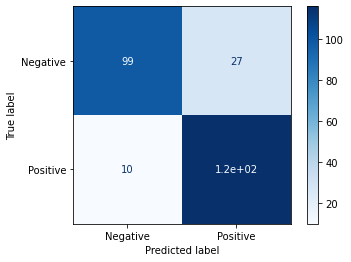

In [ ]:
# Confusion Matrix
disp = plot_confusion_matrix(gs, X_test2, y_test, display_labels=['Negative', 'Positive'],cmap=plt.cm.Blues,normalize=None)

In [ ]:
# Calculate precision, recall and f-measure scores

TN = 99
FP = 27
FN = 10
TP = 116

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f = 2*(precision*recall)/(precision+recall)

print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F-measure: {}".format(f))

Precision: 0.8111888111888111
Recall: 0.9206349206349206
F-measure: 0.862453531598513
